In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%pip install seaborn
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.feature_extraction import DictVectorizer

In [49]:
df=pd.read_csv("data/pizza_v2.csv")
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [50]:
df.dtypes

company            object
price_rupiah       object
diameter           object
topping            object
variant            object
size               object
extra_sauce        object
extra_cheese       object
extra_mushrooms    object
dtype: object

In [51]:
df.company.nunique()

5

**convert price to float**

In [52]:
df['price_rupiah'] = (df['price_rupiah'].str.replace('Rp', ' '))
df['price_rupiah'] = df['price_rupiah'].str.replace(',', '').astype(float)



In [53]:
df['diameter'] = df['diameter'].str.replace('inch', '').astype(float)


In [54]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [55]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [56]:
# df.extra_sauce=df.extra_sauce.map({'yes':1,'no':0})
# df.extra_cheese=df.extra_cheese.map({'yes':1,'no':0})
# df.extra_mushrooms=df.extra_mushrooms.map({'yes':1,'no':0})

In [57]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [58]:
df.duplicated().sum()

2

In [59]:
df=df.drop_duplicates()

In [60]:
df.duplicated().sum()

0

In [61]:

df.rename({'price_rupiah':'price'},axis=1,inplace=True)


In [62]:
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [63]:
df['price']=df['price']*0.000065
df.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,15.275,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,12.870,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,7.800,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,10.075,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,16.120,18.0,mozzarella,double_signature,jumbo,yes,no,yes


## **EDA**

<AxesSubplot:xlabel='count', ylabel='company'>

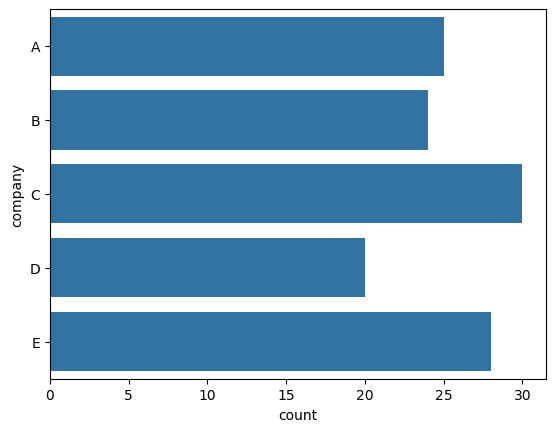

In [64]:
sns.countplot(df['company'])

<AxesSubplot:xlabel='count', ylabel='topping'>

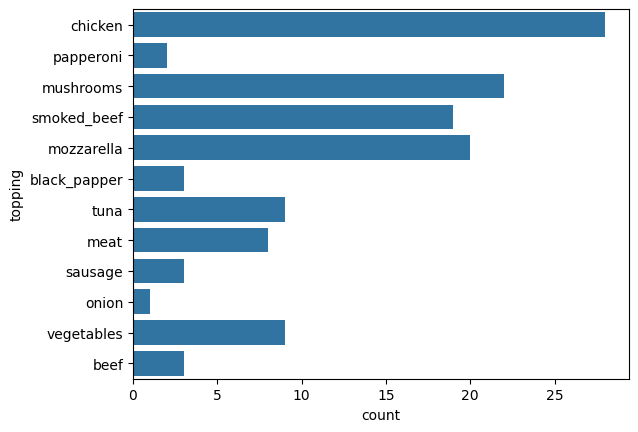

In [65]:
sns.countplot(df['topping'])

<AxesSubplot:xlabel='price', ylabel='size'>

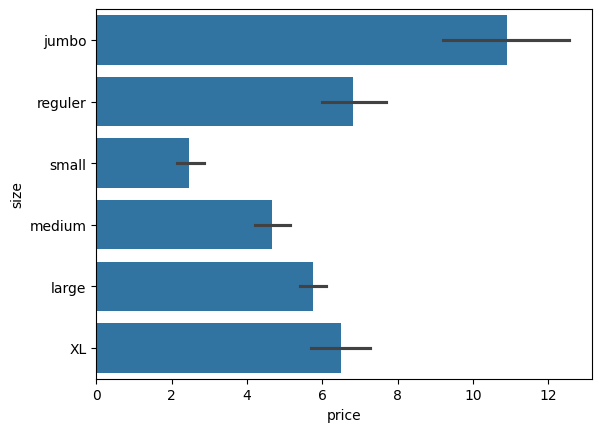

In [66]:
sns.barplot(x=df['price'],y=df['size'])

<AxesSubplot:xlabel='count', ylabel='variant'>

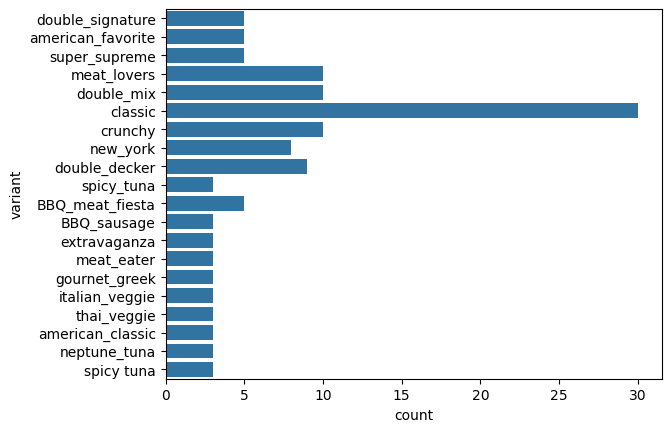

In [67]:
sns.countplot(df['variant'])

<AxesSubplot:xlabel='count', ylabel='extra_cheese'>

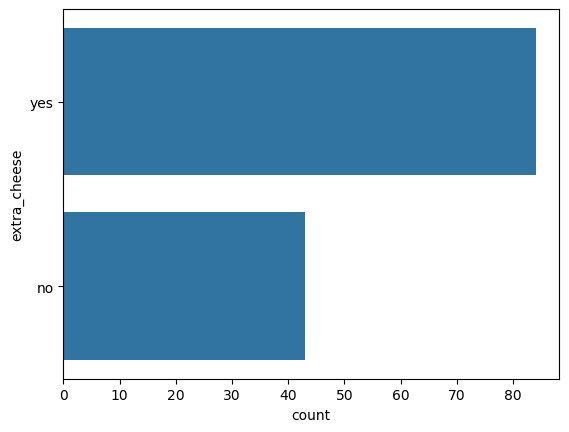

In [68]:
sns.countplot(df['extra_cheese'])

<AxesSubplot:xlabel='company', ylabel='price'>

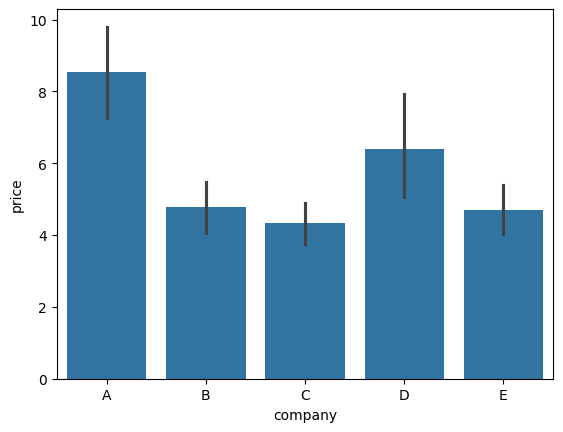

In [69]:
sns.barplot(x=df['company'],y=df['price'],data=df)

<AxesSubplot:xlabel='price', ylabel='topping'>

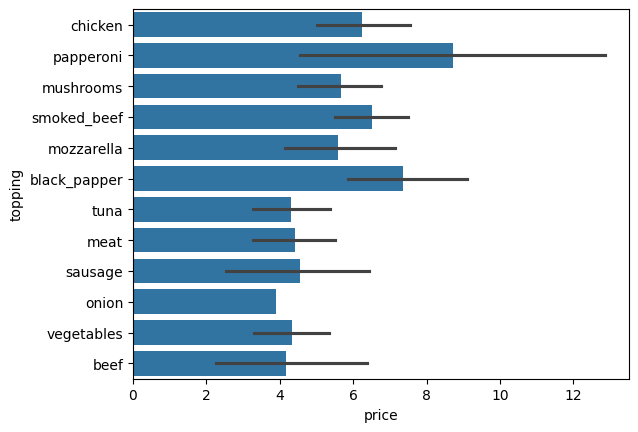

In [70]:
sns.barplot(x=df['price'],y=df['topping'],data=df)

<AxesSubplot:xlabel='price', ylabel='size'>

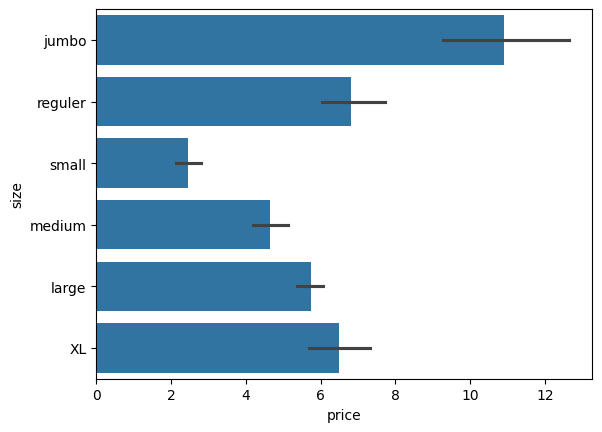

In [71]:
sns.barplot(x=df['price'],y=df['size'],data=df)

<AxesSubplot:xlabel='price', ylabel='variant'>

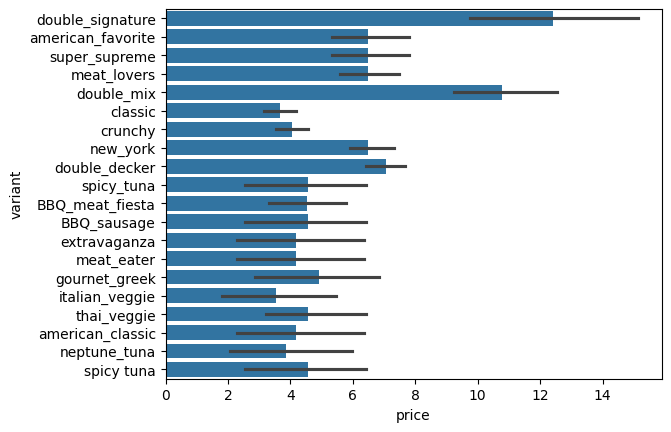

In [72]:

sns.barplot(x=df['price'],y=df['variant'],data=df)

**split data**

In [73]:
X=df.drop(['price'],axis=1)
y=df.price.values

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
print(X_train.shape)
print(X_test.shape)


(101, 8)
(26, 8)


In [76]:
print(y_train.shape)
print(y_test.shape)


(101,)
(26,)


**dealing with categorical features**

In [77]:
dv=DictVectorizer()
x_train_dict=X_train.to_dict(orient='records')
x_train=dv.fit_transform(x_train_dict)

In [78]:
x_test_dict=X_test.to_dict(orient='records')
x_test=dv.transform(x_test_dict)

**train multiple models to choose the model with best accuracy**

In [79]:
scores=[]
models={'lr':LinearRegression(),'svr':SVR(),'rf':RandomForestRegressor(),'gb':GradientBoostingRegressor()}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accurcy=r2_score(y_test,y_pred)
    scores.append(accurcy)
    

 


In [80]:
scores

[0.7982862996653537,
 0.6102831430671896,
 0.8447825213529512,
 0.8984792642999453]

In [81]:
import pandas as pd

scores = [[0.7982862996653537, 0.6102831430671896, 0.8593584593184892, 0.8938298386227198]]
model_names = ['lr', 'svr', 'rf', 'gb']

df_scores = pd.DataFrame(scores, columns=model_names)  # this code will not working to plot 
df_scores

,lr,svr,rf,gb
0,0.798286,0.610283,0.859358,0.89383


In [82]:
import pandas as pd

scores = [0.7982862996653537, 0.6102831430671896, 0.8593584593184892, 0.8938298386227198]
model_names = ['lr', 'svr', 'rf', 'gb']

data = [{'model': model, 'score': score} for model, score in zip(model_names, scores)]
df_scores = pd.DataFrame(data)

In [83]:
df_scores

,model,score
0,lr,0.798286
1,svr,0.610283
2,rf,0.859358
3,gb,0.893830


<AxesSubplot:xlabel='model', ylabel='score'>

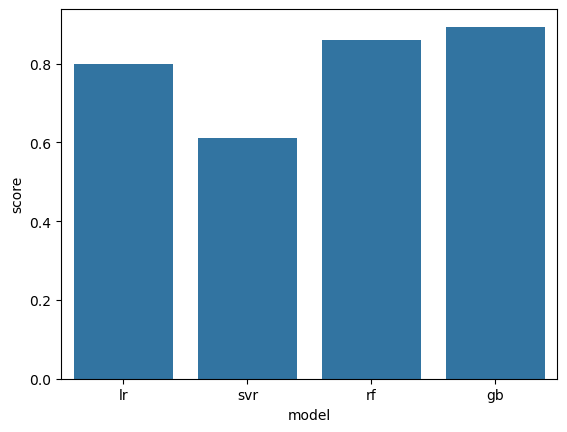

In [84]:
sns.barplot(x=df_scores.model,y=df_scores.score,data=df_scores)

**train the model again**

In [85]:
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accurcy=r2_score(y_pred,y_test)
accurcy

0.8674426327696119

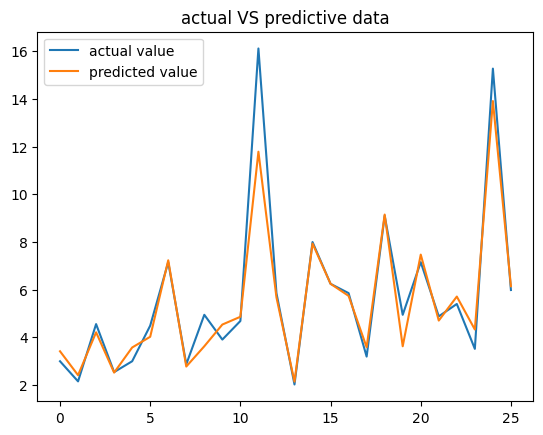

In [86]:
plt.plot(y_test,label='actual value')
plt.plot(y_pred,label='predicted value')
plt.title('actual VS predictive data')
plt.legend()